In [23]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [31]:
# Resizing images

from PIL import Image
import os, sys

path1 = "./Downloads/data2/Arms/"
path2 = "./Downloads/data2/Figure_normal_legs/"
path3 = "./Downloads/data2/FigureWheels/"
path4 = "./Downloads/data2/Head/"

dirs1 = os.listdir(path1)
dirs2 = os.listdir(path2)
dirs3 = os.listdir(path3)
dirs4 = os.listdir(path4)

def resize(path_from, path_to, dirs):
    for item in dirs:
        if os.path.isfile(path_from + item):
            im = Image.open(path_from + item)
            f, e = os.path.splitext(path_from + item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(path_to + item, quality=95)

resize(path2, "./Downloads/new_data2/Figure_normal_legs/", dirs2)
resize(path3, "./Downloads/new_data2/FigureWheels/", dirs3)
resize(path4, "./Downloads/new_data2/Head/", dirs4)


In [32]:
from PIL import Image

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
folders = [
    r'./Downloads/new_data2/Arms/',
    r'./Downloads/new_data2/Figure_normal_legs',
    r'./Downloads/new_data2/FigureWheels/',
    r'./Downloads/new_data2/Head/'
]

def load_element(folder, min_num_images):
    # Load the data for a single type of element
    image_files = os.listdir(folder)
    
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - 
                        pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_element(folder, 200))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

./Downloads/new_data2/Arms/
Full dataset tensor: (784, 28, 28)
Mean: 0.112809
Standard deviation: 0.143145
./Downloads/new_data2/Figure_normal_legs
Could not read: ./Downloads/new_data2/Figure_normal_legs/.DS_Store : cannot identify image file './Downloads/new_data2/Figure_normal_legs/.DS_Store' - it's ok, skipping.
Full dataset tensor: (622, 28, 28)
Mean: 0.0883994
Standard deviation: 0.16318
./Downloads/new_data2/FigureWheels/
Full dataset tensor: (222, 28, 28)
Mean: 0.075104
Standard deviation: 0.165659
./Downloads/new_data2/Head/
Full dataset tensor: (473, 28, 28)
Mean: 0.0372736
Standard deviation: 0.201234


Total samples number: (2101, 28, 28)
Samples for tests: (526, 4)
Samples for trains: (1575, 4)


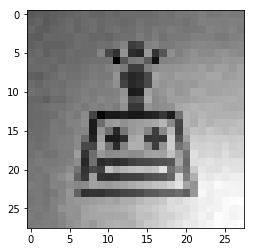

In [33]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape)
print("Samples for trains:",Y_trains.shape)
plt.imshow(X_tests[0],cmap='gray')

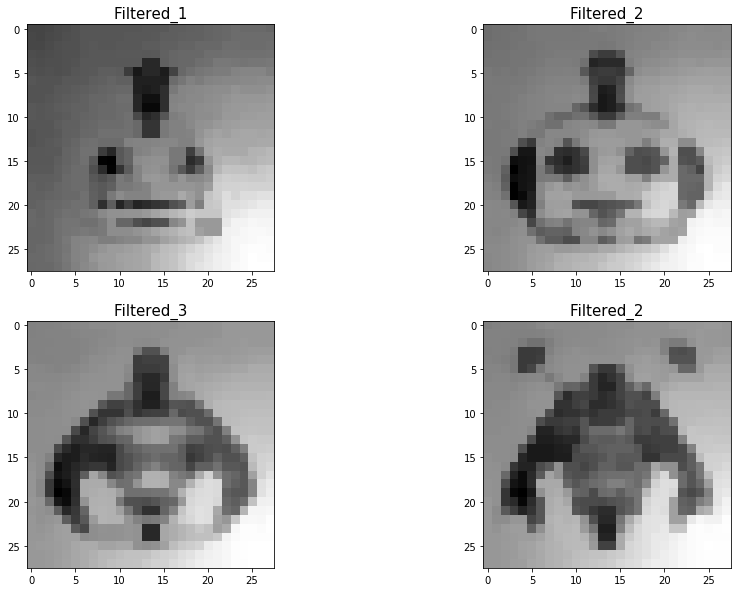

In [34]:
# TASK 1

# Median Filter
Filtered_images = ndimage.median_filter(X_tests[0:4], 3)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(Filtered_images[0],cmap='gray')
plt.title('Filtered_1', fontsize=15)
plt.subplot(222)
plt.imshow(Filtered_images[1],cmap='gray')
plt.title('Filtered_2', fontsize=15)
plt.subplot(223)
plt.imshow(Filtered_images[2],cmap='gray')
plt.title('Filtered_3', fontsize=15)
plt.subplot(224)
plt.imshow(Filtered_images[3],cmap='gray')
plt.title('Filtered_2', fontsize=15)

/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract
/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


-inf
0.418832


/Users/mbair13/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/mbair13/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


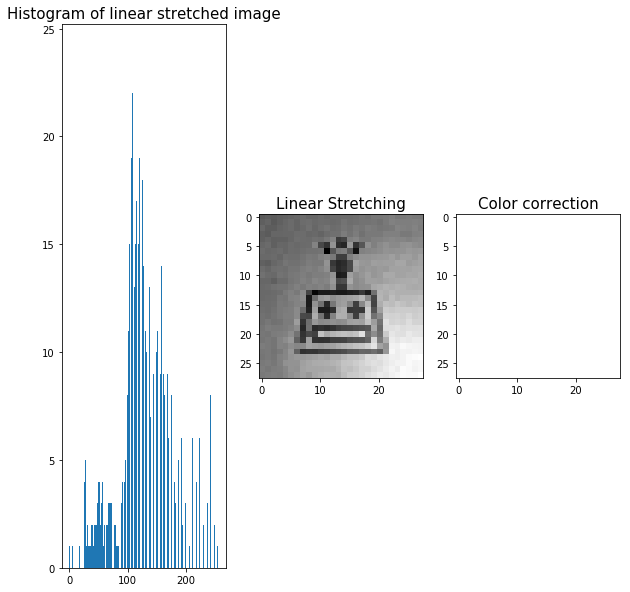

In [38]:
# TASK 2 (one example is provided)

#OUTPUT of color correction is not appropriate because miN value is equal to -infinity

# Implementation of the linear stretching of brightness
miN = np.amin(X_tests[0])
maX = np.amax(X_tests[0])
lin_out = (X_tests[0]-miN)*255/(maX-miN)

#Gauss Filter
G = ndimage.gaussian_filter(lin_out, sigma=5)
r = np.log(lin_out)-np.log(G)
miN = np.amin(r)
maX = np.amax(r)
#print(miN)
#print(maX)
r = (r-miN)/(maX-miN) #color correction formula

fig = plt.figure(figsize=(10,10))
plt.subplot(131)
plt.hist(lin_out.flatten(),256,[0,256])
plt.title('Histogram of linear stretched image', fontsize=15)
plt.subplot(132)
plt.imshow(lin_out, cmap='gray')
plt.title('Linear Stretching', fontsize=15)
plt.subplot(133)
plt.imshow(r, cmap='gray')
plt.title('Color correction', fontsize=15)


In [36]:
# TASK 3

from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=2, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

(28, 28)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
output (Dense)               (None, 4)                 1572      
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 924,732
Trainable params: 924,732
Non-trainable params: 0
_________________________________________________________________


/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_shape=(784,), activation="relu", kernel_initializer="uniform")`
/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="relu", kernel_initializer="uniform")`
/Users/mbair13/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


Train on 1181 samples, validate on 394 samples
Epoch 1/2
Epoch 00001: val_loss improved from inf to 0.26810, saving model to ./weights.net
 - 2s - loss: 0.3281 - acc: 0.8664 - val_loss: 0.2681 - val_acc: 0.8978
Epoch 2/2
Epoch 00002: val_loss did not improve
 - 2s - loss: 0.2124 - acc: 0.9143 - val_loss: 0.2811 - val_acc: 0.8782
Epoch 00002: early stopping
526/526 [==============================] - 0s 145us/step
[0.25323623815416835, 0.88830798479087447]
